# 워드 클라우드

In [1]:
# 한글폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [1]:
# 한글처리
! pip install konlpy > /dev/null

In [2]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving gift.txt to gift.txt


In [3]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving heart.jpg to heart.jpg


## 한글 텍스트 전처리

In [4]:
with open(textfile) as fp:
  text = fp.read()

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
tokens = okt.nouns(text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [53]:
## 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
  gift = re.sub('[A-Za-z0-9]', '', token)     # \w와 같음
  if gift:
    new_tokens.append(gift)

In [54]:
new_tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [55]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [56]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

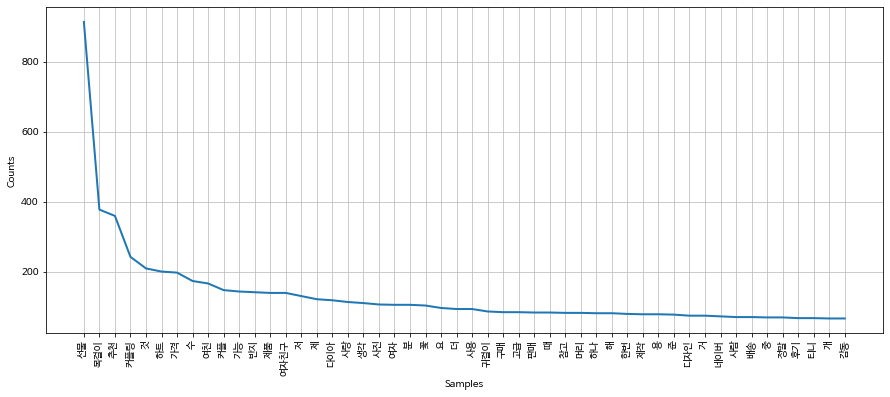

In [57]:
gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [58]:
stoptext ='''
선물 추천 것 가격 수 가능 제품 저 제 생각 사진 여자 분 요 더 사용 구매 고급 판매 때 참고 머리 하나 
해 한번 제작 용 준 디자인 거 네이버 배송 중 정말 후기 티니 감동 여자친구 사랑 하트 여친 사람 세대 인기 상품 직접 브랜드 선택 끗 끈 모양 마감 네임카드 등 
큐빅 요즘 곱창 케이스 인테리어 오늘 가지 남녀 그냥 이벤트 위 페이 마음 부담 향 로티 남자 협찬 꿋 곳 전 핸드 의미 도움 주얼리 색상 아래 포장 처 조금 하루 정도 실버 처리 보시 독서 
여성 가장 때문 정보 스타일 소품 밍티풀 주소 링크 쇼핑 기념일 헤어 질문 친구 스토어 아주 할인 미쁜 스 이면 남 지금 고민 센스 안쪽 모델 아이템 사이트 여 미니 나 밴드
심플 꽃말 은 이니셜 생일 답변 체크 날 쇼핑몰 워터 꼭 등등 크리스마스 메이드 미만 드라마 기념 유광 무광 결혼반지 뭐 말 스마트 자 및 준비 걸 액자 비 펑이 세트 알
속 클 데 구성 이 저희 좀 추억 검색 보고 가성 줄 라면 활용 젤리 로 겅우 우정 크로스 팽이 클 경우 사이 기억 에어 착용 또한 각인 여기 연인 몇개 도 보통 주인공 키 폰 여러가지 향기 건 평 손 펑
'''
stop_words = stoptext.split()

In [59]:
new_tokens = [word for word in new_tokens if word not in  stop_words]
new_tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '투척', '클래식', '커플룩']

In [60]:
len(new_tokens)

13195

## 워드 클라우드 그리기

In [61]:
from wordcloud import WordCloud
from PIL import Image

In [69]:
data = gift.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path=path,
    relative_scaling=0.2,
    background_color='white'
).generate_from_frequencies(dict(data))

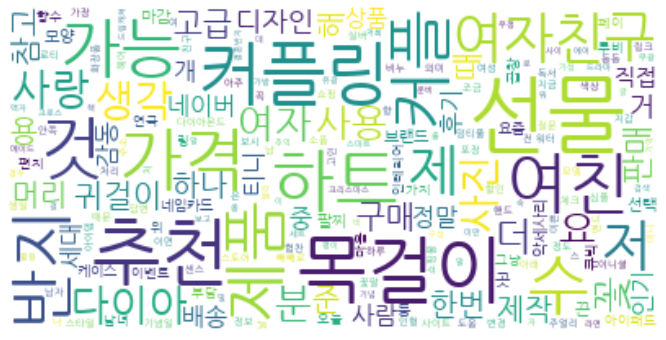

In [70]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 하트 그림에 표시

In [71]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [75]:
wc = WordCloud(
    font_path=path,
    relative_scaling=0.2,
    background_color='white',
    mask=mask,
    min_font_size =1,
    max_font_size=120
).generate_from_frequencies(dict(data))

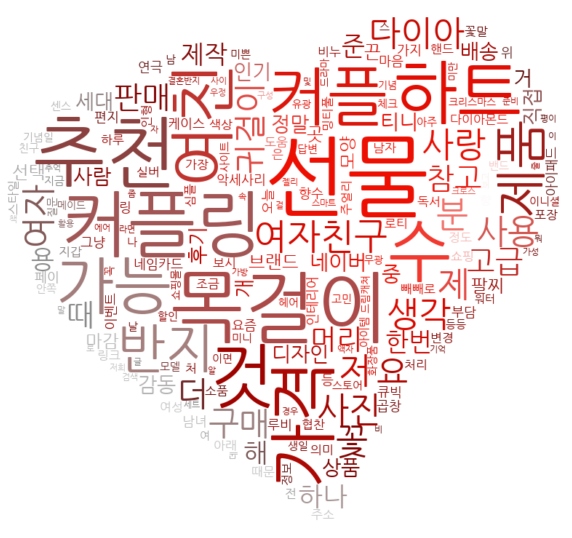

In [78]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()